<a href="https://colab.research.google.com/github/river6907/Bigdata-Analysis/blob/main/Report10_Polynormal_Regression_%EA%B0%95%EB%8F%99%EC%A4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습 10. 한국의 소득수준에 대한 기대수명 예측 문제

# **1) e-나라지표에서 다음 데이터 수집**


(1)1인당 국민총소득(GNI)

  * 1 인당 GNI(gniPercap, gni per capita)
  * 1인당 실질 국민총소득(만 원)
  * https://www.index.go.kr/unify/idx-info.do?idxCd=4221
  * 통계표-시계열조회- 1970~2020 엑셀저장

(2)성별기대수명

  * https://www.index.go.kr/unify/idx-info.do?idxCd=4234#quick_02
  
  * 통계표-시계열조회- 1970~2020 엑셀저장

(3)엑셀파일을 아래 구조로 편집하여 csv파일로 저장
  * ( GNI 셀서식 변경: 콤마(,) 없는 숫자)

In [1]:
from google.colab import files
myfile = files.upload()

Saving GNILifeExp1970_2020.csv to GNILifeExp1970_2020.csv


In [3]:
import io
import pandas as pd
GNILifeExp = pd.read_csv(io.BytesIO(myfile['GNILifeExp1970_2020.csv']))

**2) 데이터 탐색**


(1) data Load, 0번째 칼럼을 인덱스로 지정

In [5]:
GNI = GNILifeExp.set_index('year')

In [6]:
GNI.head()

,GNI,lifeExp_male,lifeExp_female
year,,,
1970,256,58.7,65.8
1971,273,59.1,66.3
1972,285,59.4,66.8
1973,321,59.7,67.3
1974,336,60.0,67.8


(2) 데이터 타입, 구조, 누락 값 동시에 확인


In [15]:
print("GNI.index = \n", GNI.index)     
print("\nGNI.columns = \n", GNI.columns) 
print("\nGNI.count = ", GNI.shape[0])
print("GNI.count = ", GNI.shape[1])

import pandas as pd
print("GNI.isnull.count =\n", GNI.isnull().sum())

GNI.index = 
 Int64Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
            1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
            1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64', name='year')

GNI.columns = 
 Index(['GNI', 'lifeExp_male', 'lifeExp_female'], dtype='object')

GNI.count =  51
GNI.count =  3
GNI.isnull.count =
 GNI               0
lifeExp_male      0
lifeExp_female    0
dtype: int64


(3)데이터 내용 일부 확인


In [16]:
print(GNI.head(5))
print(GNI.tail(5))

      GNI  lifeExp_male  lifeExp_female
year                                   
1970  256          58.7            65.8
1971  273          59.1            66.3
1972  285          59.4            66.8
1973  321          59.7            67.3
1974  336          60.0            67.8
       GNI  lifeExp_male  lifeExp_female
year                                    
2016  3391          79.3            85.4
2017  3493          79.7            85.7
2018  3532          79.7            85.7
2019  3532          80.3            86.3
2020  3530          80.5            86.5


(4)요약통계

In [17]:
print(GNI.describe())

               GNI  lifeExp_male  lifeExp_female
count    51.000000     51.000000       51.000000
mean   1679.666667     69.674510       77.178431
std    1085.520201      6.984579        6.319788
min     256.000000     58.700000       65.800000
25%     580.000000     63.150000       71.700000
50%    1699.000000     69.700000       77.900000
75%    2587.000000     76.050000       82.750000
max    3532.000000     80.500000       86.500000


(5)년도별 GNI 대한 그래프


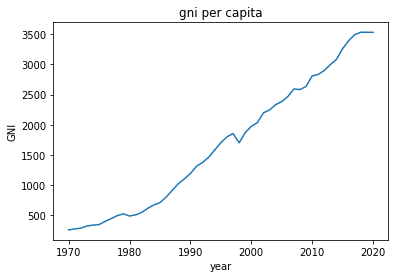

In [21]:
import numpy as np
import matplotlib.pyplot as plt

GNI['GNI'].plot()
plt.title("gni per capita")
plt.xlabel("year")
plt.ylabel("GNI")
plt.show()

(6)전체 기대수명 칼럼추가 , 남,녀 기대수명을 평균으로 계산


In [22]:
GNI['lifeExp'] = ( GNI['lifeExp_female'] + GNI['lifeExp_male'] ) / 2

In [23]:
GNI.head()

,GNI,lifeExp_male,lifeExp_female,lifeExp
year,,,,
1970,256,58.7,65.8,62.25
1971,273,59.1,66.3,62.70
1972,285,59.4,66.8,63.10
1973,321,59.7,67.3,63.50
1974,336,60.0,67.8,63.90


(7) 남,여,전체 기대수명 plotting

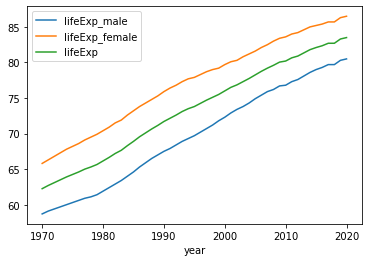

In [25]:
GNI.plot(y=['lifeExp_male', 'lifeExp_female','lifeExp'])
plt.show()

**2) 데이터 탐색**

(8) GNI(gniPercap)에 대한 평균기대수명(lifeExp) 관계 확인 (scatter plot)


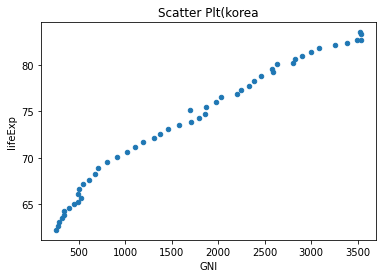

In [27]:
GNI.plot.scatter(x="GNI", y="lifeExp")
plt.title("Scatter Plt(korea")
plt.show()

(9) 전체 데이터의 평균기대수명(lifeExp)과 GNI(gniPercap)의 상관계수 확인

In [33]:
tmp = GNI[['lifeExp','GNI']].corr()
print("korea.corr =  \n",tmp)

korea.corr =  
          lifeExp     GNI
lifeExp   1.0000  0.9863
GNI       0.9863  1.0000


**3)모델링**


(11) GNI(gniPercap)에 대한 평균기대수명(lifeExp) 선형모델 생성 및 확인

In [34]:
from sklearn import linear_model
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

w (lr.coef_): [0.00603827]
b (lr.intercept_): 63.28419010362986
new X = [[   0.]
 [2000.]
 [4000.]]
Y1=  [63.2841901  75.36072968 87.43726925]


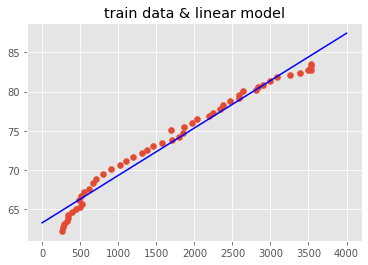

In [50]:
from sklearn.linear_model import LinearRegression
X = GNI["GNI"].values.reshape(-1, 1)
Y = GNI["lifeExp"]

lr = LinearRegression().fit(X, Y)

w = lr.coef_       #계수
b = lr.intercept_  #절편
print("w (lr.coef_):", w)
print("b (lr.intercept_):",b)

new_X = np.linspace(0,4000,3).reshape(-1,1)
Y1 = lr.predict(new_X)
print('new X =',new_X)
print('Y1= ',Y1)

plt.scatter(GNI['GNI'],GNI['lifeExp'])
plt.title("train data & linear model")
plt.plot(new_X,Y1,'blue')
plt.show()

(12) GNI(gniPercap)에 대한 평균기대수명(lifeExp) 비선형모델 생성 및 확인


w (lr.coef_): [ 9.45212933e-03 -9.44589694e-07]
b (lr.intercept_): 61.30623256516013
new X = [[0.00000000e+00 0.00000000e+00]
 [4.04040404e+01 1.63248648e+03]
 [8.08080808e+01 6.52994592e+03]
 [1.21212121e+02 1.46923783e+04]
 [1.61616162e+02 2.61197837e+04]
 [2.02020202e+02 4.08121620e+04]
 [2.42424242e+02 5.87695133e+04]
 [2.82828283e+02 7.99918376e+04]
 [3.23232323e+02 1.04479135e+05]
 [3.63636364e+02 1.32231405e+05]
 [4.04040404e+02 1.63248648e+05]
 [4.44444444e+02 1.97530864e+05]
 [4.84848485e+02 2.35078053e+05]
 [5.25252525e+02 2.75890215e+05]
 [5.65656566e+02 3.19967350e+05]
 [6.06060606e+02 3.67309458e+05]
 [6.46464646e+02 4.17916539e+05]
 [6.86868687e+02 4.71788593e+05]
 [7.27272727e+02 5.28925620e+05]
 [7.67676768e+02 5.89327620e+05]
 [8.08080808e+02 6.52994592e+05]
 [8.48484848e+02 7.19926538e+05]
 [8.88888889e+02 7.90123457e+05]
 [9.29292929e+02 8.63585348e+05]
 [9.69696970e+02 9.40312213e+05]
 [1.01010101e+03 1.02030405e+06]
 [1.05050505e+03 1.10356086e+06]
 [1.09090909e+03

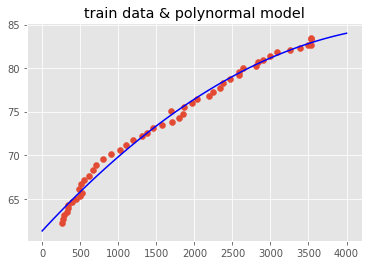

In [54]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_ploy = poly_features.fit_transform(X)

lr_2 = LinearRegression()
lr_2.fit(X_ploy,Y)

w_2 = lr_2.coef_
b_2 = lr_2.intercept_
print("w (lr.coef_):", w_2)
print("b (lr.intercept_):",b_2)

new_X_2 = np.linspace(0,4000,100).reshape(-1,1)
new_X_2_poly = poly_features.transform(new_X_2)
new_y_2 = lr_2.predict(new_X_2_poly)
print('new X =',new_X_2_poly)
print('Y1= ',new_y_2)

plt.scatter(X,Y)
plt.title("train data & polynormal model")
plt.plot(new_X_2, new_y_2, 'blue')
plt.show()